# Contents

### 1 Import Packages

### 2 Load Data

#### 2.1 Checking for NULLs

#### 2.2 Handling NULLs

#### 2.3 Handling Dates

### 3 Handling Data

#### 3.1 Set date as index

#### 3.2 Resampling Data

#### 3.3 Train Test Split

### 4 Checking Data

#### 4.1 Visualize and Resample data to a suitable time scale

#### 4.2 Stationary Testing

### 5 Resample Data

### 6 Scaling the data

### 7 Data Preparation

### 8 Keras Time Series Generator

### 9 Simple LSTM Model

### 10 Forecasting 

### 11 Inverse Transform

### 12 Plot Forecasts

### 13 Evaluation of the Forecasts

### 1 Import Packages

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

from keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

%config Completer.use_jedi = False
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

### 2 Load Data

In [36]:
dataset = pd.read_csv('C:\\Users\\Sarat\\Desktop\\Time Series Forecasting\\data\\Beijing_AirQuality_PM2.5.csv')

In [37]:
dataset.drop(columns=['No'], inplace=True)

#### 2.1 Checking for NULLs

In [38]:
dataset.isna().sum()

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

#### 2.2 Handling NULLs

#### 2.3 Handling Dates

In [39]:
dataset['Date'] = pd.to_datetime(dataset[['year', 'month', 'day', 'hour']])

In [40]:
dataset.drop(columns=['year', 'month', 'day', 'hour'], inplace = True)

### 3 Handling Data

#### 3.1 Set date as index

In [41]:
dataset_2 = dataset.set_index('Date')

#### 3.2 Resampling Data

In [42]:
dataset_3 = dataset_2.resample('D').mean()

In [43]:
dataset_3.isnull().sum()

pm2.5    37
DEWP      0
TEMP      0
PRES      0
Iws       0
Is        0
Ir        0
dtype: int64

In [44]:
dataset_3.replace(np.nan, 0, inplace=True)

#### 3.3 Train Test Split

In [45]:
datasetTrain = dataset_3[:'2014-06-30']

datasetTest = dataset_3['2014-07-01':]

In [46]:
datasetTrain

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
Date,,,,,,,
2010-01-01,0.000000,-18.750000,-6.750000,1017.083333,14.458333,0.000000,0.0
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0
...,...,...,...,...,...,...,...
2014-06-26,120.875000,20.416667,26.916667,1002.833333,12.517917,0.000000,0.0
2014-06-27,18.625000,13.125000,28.458333,1006.083333,8.737500,0.000000,0.0
2014-06-28,20.166667,13.166667,29.333333,1005.250000,17.990417,0.000000,0.0


In [47]:
datasetTest

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
Date,,,,,,,
2014-07-01,102.916667,18.916667,27.833333,1004.333333,27.209583,0.0,0.250000
2014-07-02,66.041667,20.666667,23.083333,1003.083333,2.642083,0.0,0.791667
2014-07-03,209.791667,21.958333,25.791667,1001.000000,6.409583,0.0,0.000000
2014-07-04,204.500000,22.583333,27.583333,1004.333333,8.002917,0.0,0.000000
2014-07-05,120.708333,21.833333,26.916667,1006.583333,8.176667,0.0,0.000000
...,...,...,...,...,...,...,...
2014-12-27,238.666667,-9.666667,-1.791667,1027.833333,9.278333,0.0,0.000000
2014-12-28,197.375000,-10.791667,1.583333,1019.958333,10.948750,0.0,0.000000
2014-12-29,159.000000,-12.333333,0.750000,1013.750000,8.000000,0.0,0.000000


### 4 Checking Data

#### 4.1 Visualize and Resample data to a suitable time scale

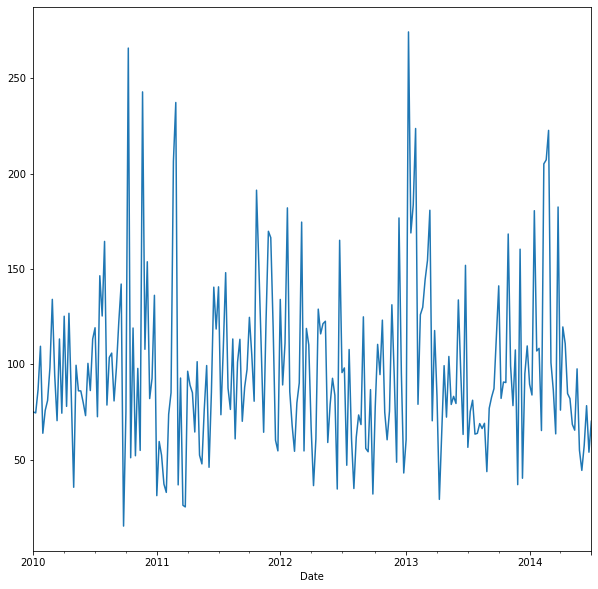

In [48]:
datasetTrain['pm2.5'].resample('W').mean().plot(figsize=(10, 10))
plt.show()

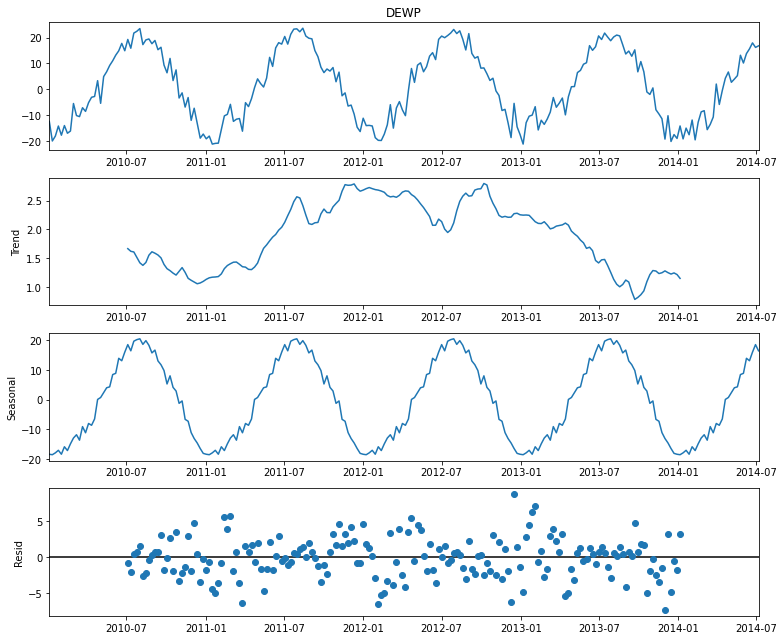

In [49]:
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(datasetTrain.resample('W').mean()['DEWP'], model='additive')
fig = decomposition.plot()
plt.show()

#### 4.2 Stationary Testing

In [50]:
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

#### Checking the stationarity of the data with weekly resampling

In [51]:
for each in datasetTrain.columns:
    
    print('Stationarity Test for ', each, 'column:\n')
    adf_test(datasetTrain.resample('W').mean()[[each]])
    print('\n\n')

Stationarity Test for  pm2.5 column:

Test Statistic         -1.308958e+01
p-value                 1.800101e-24
# Lags                  0.000000e+00
# Observations          2.350000e+02
Critical Value (1%)    -3.458487e+00
Critical Value (5%)    -2.873919e+00
Critical Value (10%)   -2.573367e+00
dtype: float64
 Series is Stationary



Stationarity Test for  DEWP column:

Test Statistic         -7.228288e+00
p-value                 2.025828e-10
# Lags                  1.400000e+01
# Observations          2.210000e+02
Critical Value (1%)    -3.460291e+00
Critical Value (5%)    -2.874709e+00
Critical Value (10%)   -2.573789e+00
dtype: float64
 Series is Stationary



Stationarity Test for  TEMP column:

Test Statistic         -7.716140e+00
p-value                 1.226841e-11
# Lags                  1.200000e+01
# Observations          2.230000e+02
Critical Value (1%)    -3.460019e+00
Critical Value (5%)    -2.874590e+00
Critical Value (10%)   -2.573725e+00
dtype: float64
 Series is Stati

### 5 Resample Data

In [52]:
trainResampled = datasetTrain.resample('W').mean()
testResampled = datasetTest.resample('W').mean()

### 6 Scaling the data

#### Neural Networks work best when all the variables have a similar range of values. The MinMaxScaler will transform the data to lie between -1 and 1 but the distribution of data will be preserved.

In [53]:
scaler = MinMaxScaler(feature_range=(-1, 1))

scaler = scaler.fit(trainResampled)

In [54]:
trainScaled = scaler.transform(trainResampled)

trainScaled = pd.DataFrame(trainScaled, columns=trainResampled.columns, index=trainResampled.index)

In [55]:
testScaled = scaler.transform(testResampled)
testScaled = pd.DataFrame(testScaled, columns=testResampled.columns, index=testResampled.index)

In [56]:
trainX , trainY = trainScaled[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']].values , trainScaled['pm2.5'].values

testX , testY = testScaled[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']].values, testScaled['pm2.5'].values

### 7 Data Preparation

##### The LSTM model is a supervised algorithm. It maps a sequence of past observations as input to an output observation

##### Therefore a given time series needs to be transformed into examples of a certain number of observations as the input and the next observation as the output.

 - If 10, 20, 30, 40, 50, 60, 70 .... is a time series
 - The train samples will be 
 
 ##### X
 10, 20, 30
 ##### Y
 40
 
 ##### X
 20, 30, 40
 ##### Y
 50
 
 and so on...

### 8 Keras Time Series Generator

#### As explained above, LSTM expects data to have the shape [samples, timesteps, features]
#### The keras time series generator used below will transform our data into the appropriate structure

In [57]:
TrainGenerator = TimeseriesGenerator(trainX, trainY, length=5)

In [58]:
TestGenerator = TimeseriesGenerator(testX, testY, length=5)

### 9 LSTM Model

In [59]:
# design network
model = None
model = Sequential()

model.add(LSTM(50, input_shape=(TrainGenerator[0][0].shape[1], TrainGenerator[0][0].shape[2])))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')

In [60]:
# fit network
history = None
history = model.fit(TrainGenerator, epochs=50, validation_data=TestGenerator, verbose=2)

Epoch 1/50
2/2 - 0s - loss: 0.5136 - val_loss: 0.4961
Epoch 2/50
2/2 - 0s - loss: 0.4330 - val_loss: 0.4261
Epoch 3/50
2/2 - 0s - loss: 0.3660 - val_loss: 0.3637
Epoch 4/50
2/2 - 0s - loss: 0.3072 - val_loss: 0.3053
Epoch 5/50
2/2 - 0s - loss: 0.2714 - val_loss: 0.2636
Epoch 6/50
2/2 - 0s - loss: 0.2566 - val_loss: 0.2389
Epoch 7/50
2/2 - 0s - loss: 0.2604 - val_loss: 0.2419
Epoch 8/50
2/2 - 0s - loss: 0.2740 - val_loss: 0.2466
Epoch 9/50
2/2 - 0s - loss: 0.2782 - val_loss: 0.2451
Epoch 10/50
2/2 - 0s - loss: 0.2733 - val_loss: 0.2399
Epoch 11/50
2/2 - 0s - loss: 0.2625 - val_loss: 0.2359
Epoch 12/50
2/2 - 0s - loss: 0.2552 - val_loss: 0.2362
Epoch 13/50
2/2 - 0s - loss: 0.2519 - val_loss: 0.2442
Epoch 14/50
2/2 - 0s - loss: 0.2527 - val_loss: 0.2515
Epoch 15/50
2/2 - 0s - loss: 0.2538 - val_loss: 0.2542
Epoch 16/50
2/2 - 0s - loss: 0.2552 - val_loss: 0.2561
Epoch 17/50
2/2 - 0s - loss: 0.2551 - val_loss: 0.2550
Epoch 18/50
2/2 - 0s - loss: 0.2545 - val_loss: 0.2495
Epoch 19/50
2/2 - 0

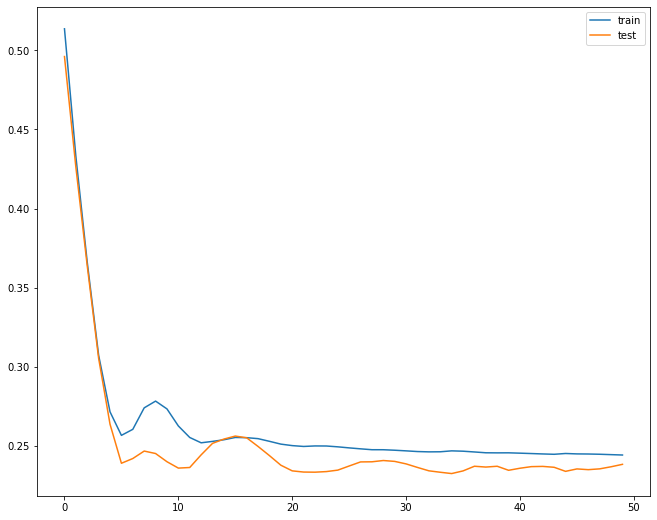

In [61]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### 10 Forecasting 

In [62]:
testPredict = model.predict(TestGenerator)

### 11 Inverse Transform

#### We need to reverse the MinMax Scaling operation to get the actual values of the forecasts to compare them with the true values

In [63]:
testData = testScaled.drop(testScaled.head(5).index)

testData['pm2.5'] = testPredict

In [64]:
testInverted = scaler.inverse_transform(testData)

In [65]:
testResampled = testResampled.drop(testResampled.head(5).index)

In [66]:
testInverted = pd.DataFrame(testInverted, columns=testResampled.columns, index=testResampled.index)

### 12 Plot Forecasts

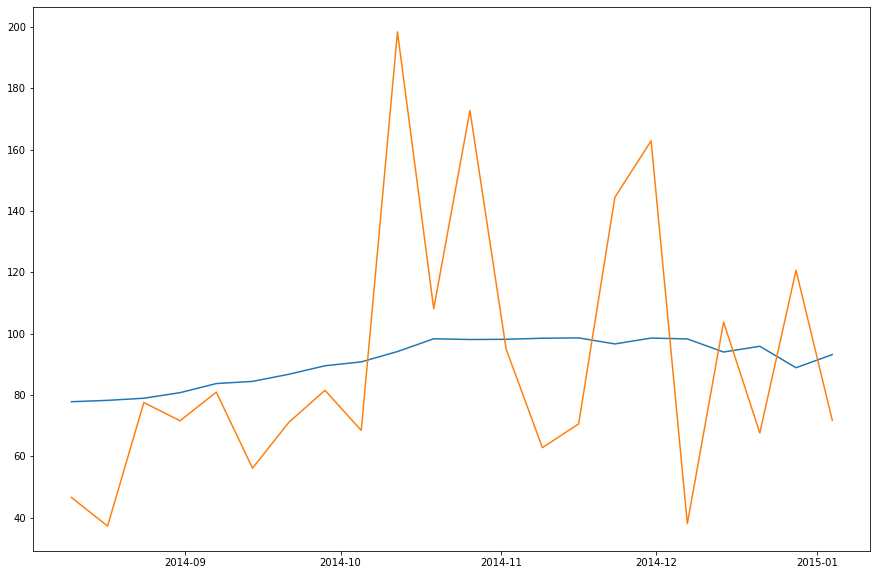

In [67]:
plt.figure(figsize=(15,10))
plt.plot(testInverted['pm2.5'])
plt.plot(testResampled['pm2.5'])
plt.show()

### 13 Evaluation of the Forecasts

In [68]:
mae = mean_absolute_error(testResampled['pm2.5'], testInverted['pm2.5'])
print('MAE: %.3f' % mae)

mape = mean_absolute_percentage_error(testResampled['pm2.5'], testInverted['pm2.5'])
print('MAPE: %.3f' % mape)

MAE: 30.884
MAPE: 0.388
